In [79]:
# Dependencies and Setup

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [80]:
#pass through data files
empl_data_path =  "data/employment_data_cleaned.csv"

# Read the employment data 
empl_data = pd.read_csv(empl_data_path)

#display the data table for preview
empl_data.head

<bound method NDFrame.head of        Year                   Hobbyist        Income  \
0      2017                  Yes, both   43750.00000   
1      2017  Yes, I program as a hobby   51282.05128   
2      2017                         No   25000.00000   
3      2017  Yes, I program as a hobby  100000.00000   
4      2017                  Yes, both   27000.00000   
...     ...                        ...           ...   
33596  2020                        Yes  225000.00000   
33597  2020                        Yes     369.00000   
33598  2020                         No   38484.00000   
33599  2020                        Yes  140000.00000   
33600  2020                        Yes  129718.00000   

                                    Country            EdLevel  \
0                            United Kingdom  Bachelor's degree   
1                                   Denmark       some college   
2                                    Israel       some college   
3                             Uni

In [81]:
#clean up data and reduce dataset as much as possible

df = pd.read_csv('data/employment_data_cleaned.csv')
df = df[df['Data scientist or machine learning specialist']==1]
valc = df['Country'].value_counts()
country_list = valc[valc >= 50].index.tolist()
df = df[df['Country'].isin(country_list)]

rename_income = df.rename(columns = {'ConvertedComp':'Income'})

# Exclude 5% of smallest and 5% of highest salaries
P = np.percentile(df['Income'], [5, 95])
df = df[(df['Income'] > P[0]) & (df['Income'] < P[1])]

# Convert compensations into kUSD/year
df['Income'] = round(df['Income']*1e-3,1)

# Exclude columns with non-unique values
df = df[df.columns[df.nunique() > 1]]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8762 entries, 0 to 33599
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    8762 non-null   int64  
 1   Hobbyist                8762 non-null   object 
 2   Income                  8762 non-null   float64
 3   Country                 8762 non-null   object 
 4   EdLevel                 8711 non-null   object 
 5   Employment              8753 non-null   object 
 6   JobSat                  8742 non-null   float64
 7   OrgSize                 8393 non-null   object 
 8   UndergradMajor          8273 non-null   object 
 9   YearsCodePro            8748 non-null   float64
 10  Database administrator  8762 non-null   int64  
dtypes: float64(3), int64(2), object(6)
memory usage: 821.4+ KB


In [82]:
df = df.dropna()

In [83]:
df.isnull().any()

Year                      False
Hobbyist                  False
Income                    False
Country                   False
EdLevel                   False
Employment                False
JobSat                    False
OrgSize                   False
UndergradMajor            False
YearsCodePro              False
Database administrator    False
dtype: bool

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7894 entries, 0 to 33599
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    7894 non-null   int64  
 1   Hobbyist                7894 non-null   object 
 2   Income                  7894 non-null   float64
 3   Country                 7894 non-null   object 
 4   EdLevel                 7894 non-null   object 
 5   Employment              7894 non-null   object 
 6   JobSat                  7894 non-null   float64
 7   OrgSize                 7894 non-null   object 
 8   UndergradMajor          7894 non-null   object 
 9   YearsCodePro            7894 non-null   float64
 10  Database administrator  7894 non-null   int64  
dtypes: float64(3), int64(2), object(6)
memory usage: 740.1+ KB


In [85]:
country_df = df['Country'].value_counts()
country_df

mean_income_country = df.groupby(['Country'])['Income'].mean().sort_values(ascending = False).head(10)
mean_income_country



Country
United States     101.512795
Israel             97.018812
Switzerland        94.021605
Denmark            81.612903
Norway             79.558824
Australia          76.496859
Canada             70.426225
United Kingdom     66.893333
Ireland            65.626923
New Zealand        64.111321
Name: Income, dtype: float64

In [97]:
# will create list of all countries
lists_of_country_mean = mean_income_country.index
print(lists_of_country_mean)


Index(['United States', 'Israel', 'Switzerland', 'Denmark', 'Norway',
       'Australia', 'Canada', 'United Kingdom', 'Ireland', 'New Zealand'],
      dtype='object', name='Country')


<AxesSubplot:xlabel='Country'>

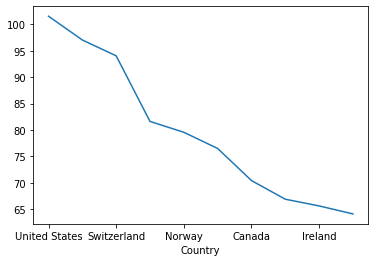

In [94]:
mean_income_country.plot(kind = 'line')

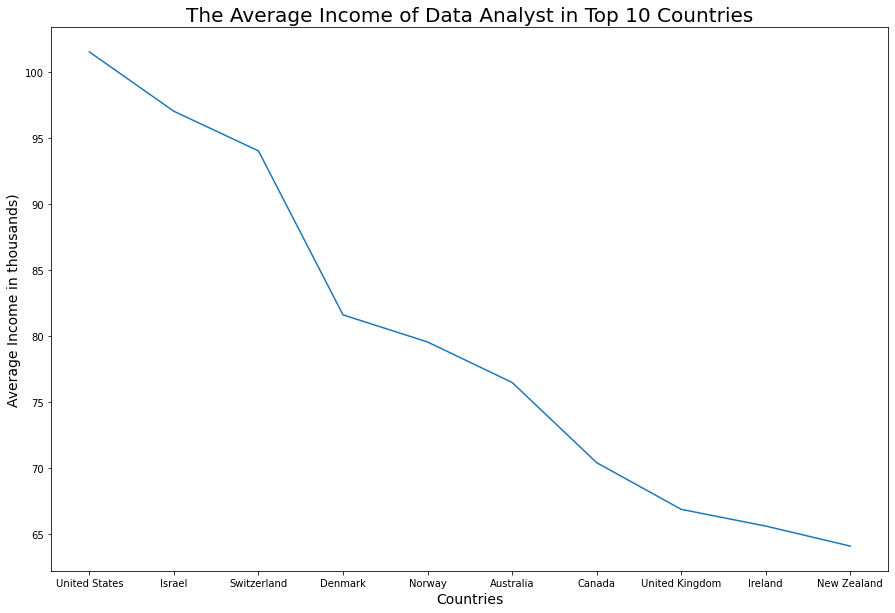

In [130]:
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.title('The Average Income of Data Analyst in Top 10 Countries',fontsize =20)
mean_income_country.plot(kind = 'line')
plt.xlabel('Countries',fontsize =14)
plt.ylabel('Average Income in thousands)',fontsize =14)
plt.xticks(range(len(lists_of_country)),lists_of_country)

plt.savefig("mean_income_country.png", bbox_inches = "tight")
plt.show()

In [86]:
med_income_country = df.groupby(['Country'])['Income'].median().sort_values(ascending = False).head(10)

med_income_country

Country
Israel            105.3
United States     100.0
Switzerland        91.4
Norway             80.3
Denmark            79.2
Australia          72.5
Canada             66.8
Ireland            62.1
Germany            61.7
United Kingdom     60.0
Name: Income, dtype: float64

In [104]:
# will create list of all countries
lists_of_country_median = med_income_country.index
print(lists_of_country_median)

Index(['Israel', 'United States', 'Switzerland', 'Norway', 'Denmark',
       'Australia', 'Canada', 'Ireland', 'Germany', 'United Kingdom'],
      dtype='object', name='Country')


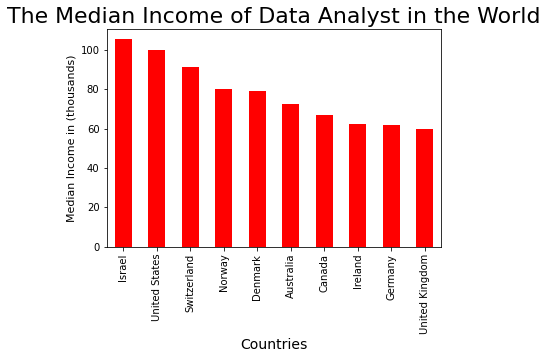

In [129]:
# data_df[“Job Title”].value_counts().sort_values(ascending=False).head(20).plot.bar(color=color)

plt.title('The Median Income of Data Analyst in the World',fontsize =)
df.groupby(['Country'])['Income'].median().sort_values(ascending = False).head(10).plot.bar(color = 'r')
plt.xlabel('Countries',fontsize =14)
plt.ylabel('Median Income in (thousands)',fontsize =11)
plt.savefig("med_income_country.png", bbox_inches = "tight")

plt.show()



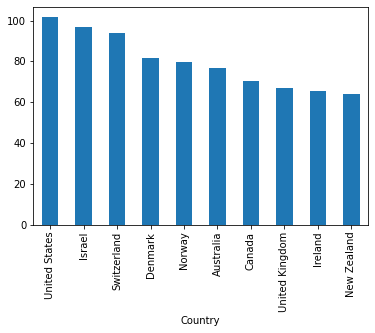

In [90]:

df.groupby(['Country'])['Income'].mean().sort_values(ascending = False).head(10).plot.bar()

plt.show()